In [2]:
import matplotlib.pyplot as plt
import pandas as pd

url = 'https://raw.githubusercontent.com/adefriece/DeFriece_Hockey/refs/heads/main/'

season = {}

for year in range(2015,2025):
    try:
        filepath = f'{url}{year}-{year-1999}.csv'
        print(filepath)
        season[year] = pd.read_csv(filepath)
    except:
        print(f'Cannot find file {filepath}')
    
season[2015]


https://raw.githubusercontent.com/adefriece/DeFriece_Hockey/refs/heads/main/2015-16.csv
https://raw.githubusercontent.com/adefriece/DeFriece_Hockey/refs/heads/main/2016-17.csv
https://raw.githubusercontent.com/adefriece/DeFriece_Hockey/refs/heads/main/2017-18.csv
https://raw.githubusercontent.com/adefriece/DeFriece_Hockey/refs/heads/main/2018-19.csv
https://raw.githubusercontent.com/adefriece/DeFriece_Hockey/refs/heads/main/2019-20.csv
https://raw.githubusercontent.com/adefriece/DeFriece_Hockey/refs/heads/main/2020-21.csv
https://raw.githubusercontent.com/adefriece/DeFriece_Hockey/refs/heads/main/2021-22.csv
https://raw.githubusercontent.com/adefriece/DeFriece_Hockey/refs/heads/main/2022-23.csv
https://raw.githubusercontent.com/adefriece/DeFriece_Hockey/refs/heads/main/2023-24.csv
https://raw.githubusercontent.com/adefriece/DeFriece_Hockey/refs/heads/main/2024-25.csv


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Scoring,Scoring.1,Scoring.2,Unnamed: 9,...,Ice Time.1,Faceoffs,Faceoffs.1,Faceoffs.2,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,-additional
0,Rk,Player,Age,Team,Pos,GP,G,A,PTS,+/-,...,ATOI,FOW,FOL,FO%,BLK,HIT,TAKE,GIVE,Awards,-9999
1,1,Patrick Kane,27,CHI,RW,82,46,60,106,17,...,20:25,11,40,21.6,21,37,34,37,ASGASnhl-1Byng-18Hart-1Ross-1Pearson-1,kanepa01
2,2,Jamie Benn,26,DAL,LW,82,41,48,89,7,...,20:01,226,252,47.3,55,156,65,80,ASGASnhl-1Hart-3,bennja01
3,3,Sidney Crosby,28,PIT,C,80,36,49,85,19,...,20:28,986,921,51.7,35,90,40,47,ASnhl-1Byng-35Hart-2Selke-7,crosbsi01
4,4,Erik Karlsson,25,OTT,D,82,16,66,82,-2,...,28:58,0,1,0.0,175,84,61,96,ASGASnhl-2Hart-9Norris-2,karlser01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1135,987,Miles Wood,20,NJD,LW,1,0,0,0,0,...,13:06,0,0,NaN,0,1,0,0,NaN,woodmi01
1136,988,Brendan Woods,23,CAR,LW,5,0,0,0,0,...,8:42,0,1,0.0,0,3,1,1,NaN,woodsbr01
1137,989,Jeff Zatkoff,28,PIT,G,14,0,0,0,0,...,52:17,0,0,NaN,0,0,0,3,NaN,zatkoje01
1138,990,Harry Zolnierczyk,28,ANA,LW,1,0,0,0,-1,...,8:48,0,0,NaN,0,3,0,0,NaN,zolniha01


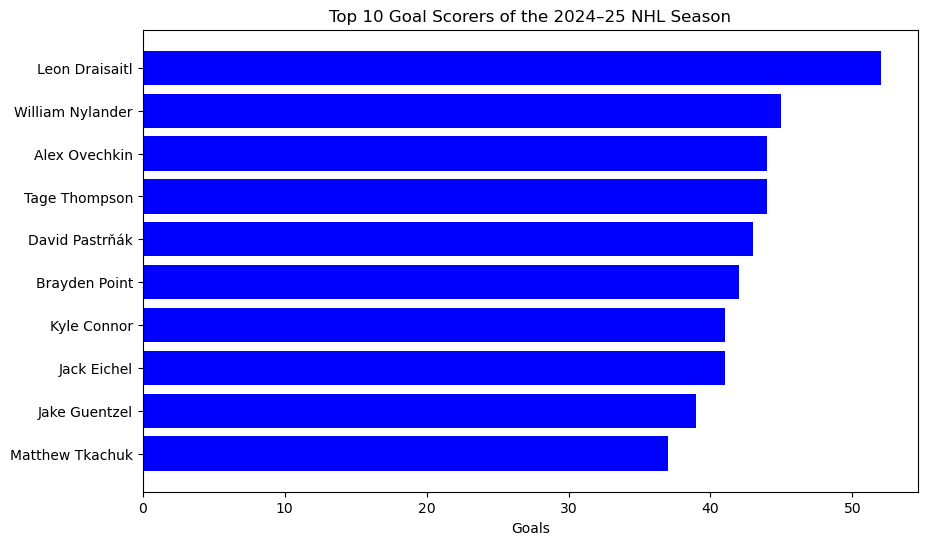

In [ ]:
import matplotlib.pyplot as plt

players = ['Leon Draisaitl', 'William Nylander', 'Alex Ovechkin', 'Tage Thompson', 'David Pastrňák', 
           'Brayden Point', 'Kyle Connor', 'Jack Eichel', 'Jake Guentzel', 'Matthew Tkachuk']
goals = [52, 45, 44, 44, 43, 42, 41, 41, 39, 37]

plt.figure(figsize=(10, 6))
plt.barh(players, goals, color='blue')
plt.xlabel('Goals')
plt.title('Top 10 Goal Scorers of the 2024–25 NHL Season')
plt.gca().invert_yaxis()
plt.show()



In [4]:
print(df.columns)

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Scoring', 'Scoring.1', 'Scoring.2', 'Unnamed: 9',
       'Unnamed: 10', 'Goals', 'Goals.1', 'Goals.2', 'Goals.3', 'Assists',
       'Assists.1', 'Assists.2', 'Shots', 'Shots.1', 'Shots.2', 'Ice Time',
       'Ice Time.1', 'Faceoffs', 'Faceoffs.1', 'Faceoffs.2', 'Unnamed: 26',
       'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30',
       '-additional'],
      dtype='object')


R² Score: 0.2852


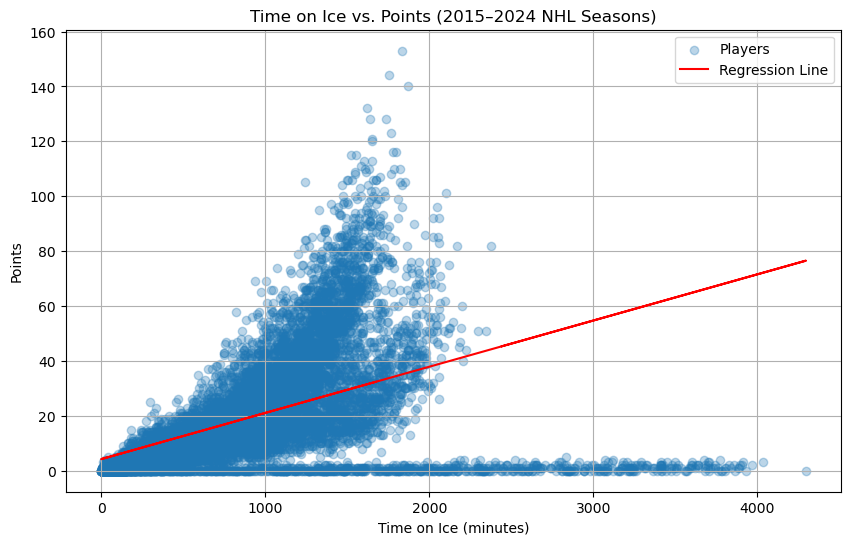

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/adefriece/DeFriece_Hockey/refs/heads/main/'
season = {}

for year in range(2015, 2025):
    try:
        filepath = f'{url}{year}-{year - 1999}.csv'
       
        df = pd.read_csv(filepath)
        df.rename(columns={
            'Scoring.2': 'PTS',
            'Ice Time': 'TOI'
        }, inplace=True)

        df = df[['TOI', 'PTS']].dropna()

        def convert_toi(toi_str):
            try:
                minutes, seconds = map(int, toi_str.split(':')) "OpenAI,2023"
                return minutes + seconds / 60
            except:
                return None

        df['TOI_minutes'] = df['TOI'].apply(convert_toi) "OpenAI,2023"
        df = df.dropna(subset=['TOI_minutes'])

        df['PTS'] = pd.to_numeric(df['PTS'], errors='coerce')
        df = df.dropna(subset=['PTS'])

        season[year] = df
        
    except Exception as e:
        print(f'Failed for {year}: {e}')

combined_df = pd.concat(season.values(), ignore_index=True)

X = combined_df[['TOI_minutes']]
y = combined_df['PTS']

model = LinearRegression()
model.fit(X, y)

r_squared = model.score(X, y)
print(f"R² Score: {r_squared:.4f}")

slope = model.coef_[0]
intercept = model.intercept_

plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.3, label='Players')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.xlabel('Time on Ice (minutes)')
plt.ylabel('Points')
plt.title('Time on Ice vs. Points (2015–2024 NHL Seasons)')
plt.legend()
plt.grid(True)
plt.show()

